# Coding Logistic Regression From Scratch - Lab

## Introduction

In this lab, you'll practice your ability to translate mathematical algorithms into Python functions. This will deepen and solidify your understanding of logistic regression!

## Objectives

In this lab you will: 

- Build a logistic regression model from scratch using gradient descent 

## Overview

Recall that the logistic regression algorithm builds upon the intuition from linear regression. In logistic regression, you start by taking the input data, `X`, and multiplying it by a vector of weights for each of the individual features, which produces an output, `y`. Afterward, you'll work on using an iterative approach via gradient descent to tune these weights. 

## Linear regression setup

Write a simple function `predict_y()` that takes in a matrix `X` of observations and a vector of feature weights `w` and outputs a vector of predictions for the various observations.

Recall that this is the sum of the product of each of the feature observations and their corresponding feature weights:  
  
$\large \hat{y}_i = X_{i1} \cdot w_1 + X_{i2} \cdot w_2 + X_{i3} \cdot w_3 + ... + X_{in} \cdot w_n$

> **Hint**: Think about which mathematical operation you've seen previously that will take a matrix (`X`) and multiply it by a vector of weights (`w`). Use NumPy! 

In [1]:
# Your code here
import numpy as np

def predict_y(X, w): 
    pass

## The sigmoid function

Recall that the sigmoid function is used to map the linear regression model output to a range of 0 to 1, satisfying basic premises of probability. As a reminder, the sigmoid function is defined by:  
  
$S(x) = \dfrac{1}{1+e^(-x)}$   
  
Write this as a Python function where `x` is the input and the function outputs the result of the sigmoid function. 

> **Hint**: Use NumPy!

In [2]:
# Your code here
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Plot the sigmoid

For good measure, let's do a brief investigation of your new function. Plot the output of your `sigmoid()` function using 10,000 values evenly spaced from -20 to 20. 

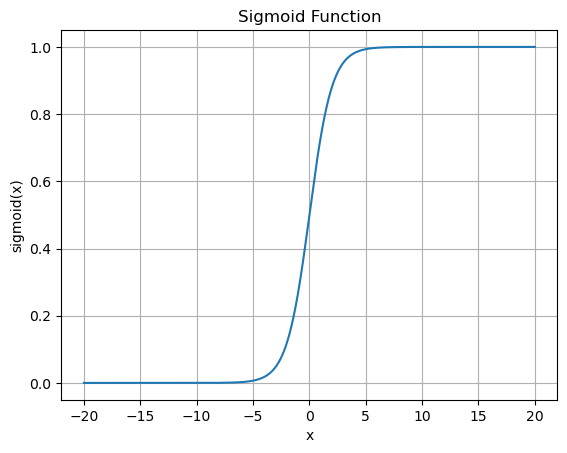

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot sigmoid
x_values = np.linspace(-20, 20, 10000)
y_values = sigmoid(x_values)

plt.plot(x_values, y_values)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()


## Gradient descent with the sigmoid function

Recall that gradient descent is a numerical method for finding a minimum to a cost function. In the case of logistic regression, you are looking to minimize the error between the model's predictions and the actual data labels. To do this, you first calculate an error vector based on the current model's feature weights. You then multiply the transpose of the training matrix itself by this error vector in order to obtain the gradient. Finally, you take the gradient, multiply it by the step size and add this to our current weight vector to update it. Below, write such a function. It will take 5 inputs:  

* `X`  
* `y`   
* `max_iterations`   
* `alpha` (the step size)   
* `initial_weights`   


By default, have your function set the `initial_weights` parameter to a vector where all feature weights are set to 1. 

In [4]:
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Perform gradient descent to learn weights for logistic regression."""
    if initial_weights is None:
        initial_weights = np.ones(X.shape[1])
    
    weights = initial_weights
    
    for _ in range(max_iterations):
        # Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X, weights))
        
        # Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        
        # Calculate the gradient
        gradient = np.dot(X.T, error_vector)
        
        # Update the weight vector: take a step of alpha in the direction of the gradient
        weights += alpha * gradient
    
    # Return finalized weights
    return weights

## Running your algorithm

Now that you've coded everything from the ground up, you can further investigate the convergence behavior of the gradient descent algorithm. Remember that gradient descent does not guarantee a global minimum, only a local minimum, and that small deviations in the starting point or step size can lead to different outputs.  
  
First, run the following cell to import the data and create the predictor and target variables: 

In [5]:
# Import data
import pandas as pd
df = pd.read_csv('heart.csv')

# Create the predictor and target variables
y = df['target']
X = df.drop(columns=['target'], axis=1)

print(y.value_counts())
X.head()

target
1.0    165
0.0    138
Name: count, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


Run your algorithm and plot the successive weights of the features through iterations. Below is a dataset, with `X` and `y` predefined for you. Use your logistic regression function to train a model. As the model trains, record the iteration cycle of the gradient descent algorithm and the weights of the various features. Then, plot this data on subplots for each of the individual features. Each graph should have the iteration number on the x-axis and the value of that feature weight for that iteration cycle on the y-axis. This will visually display how the algorithm is adjusting the weights over successive iterations, and hopefully show convergence to stable weights.

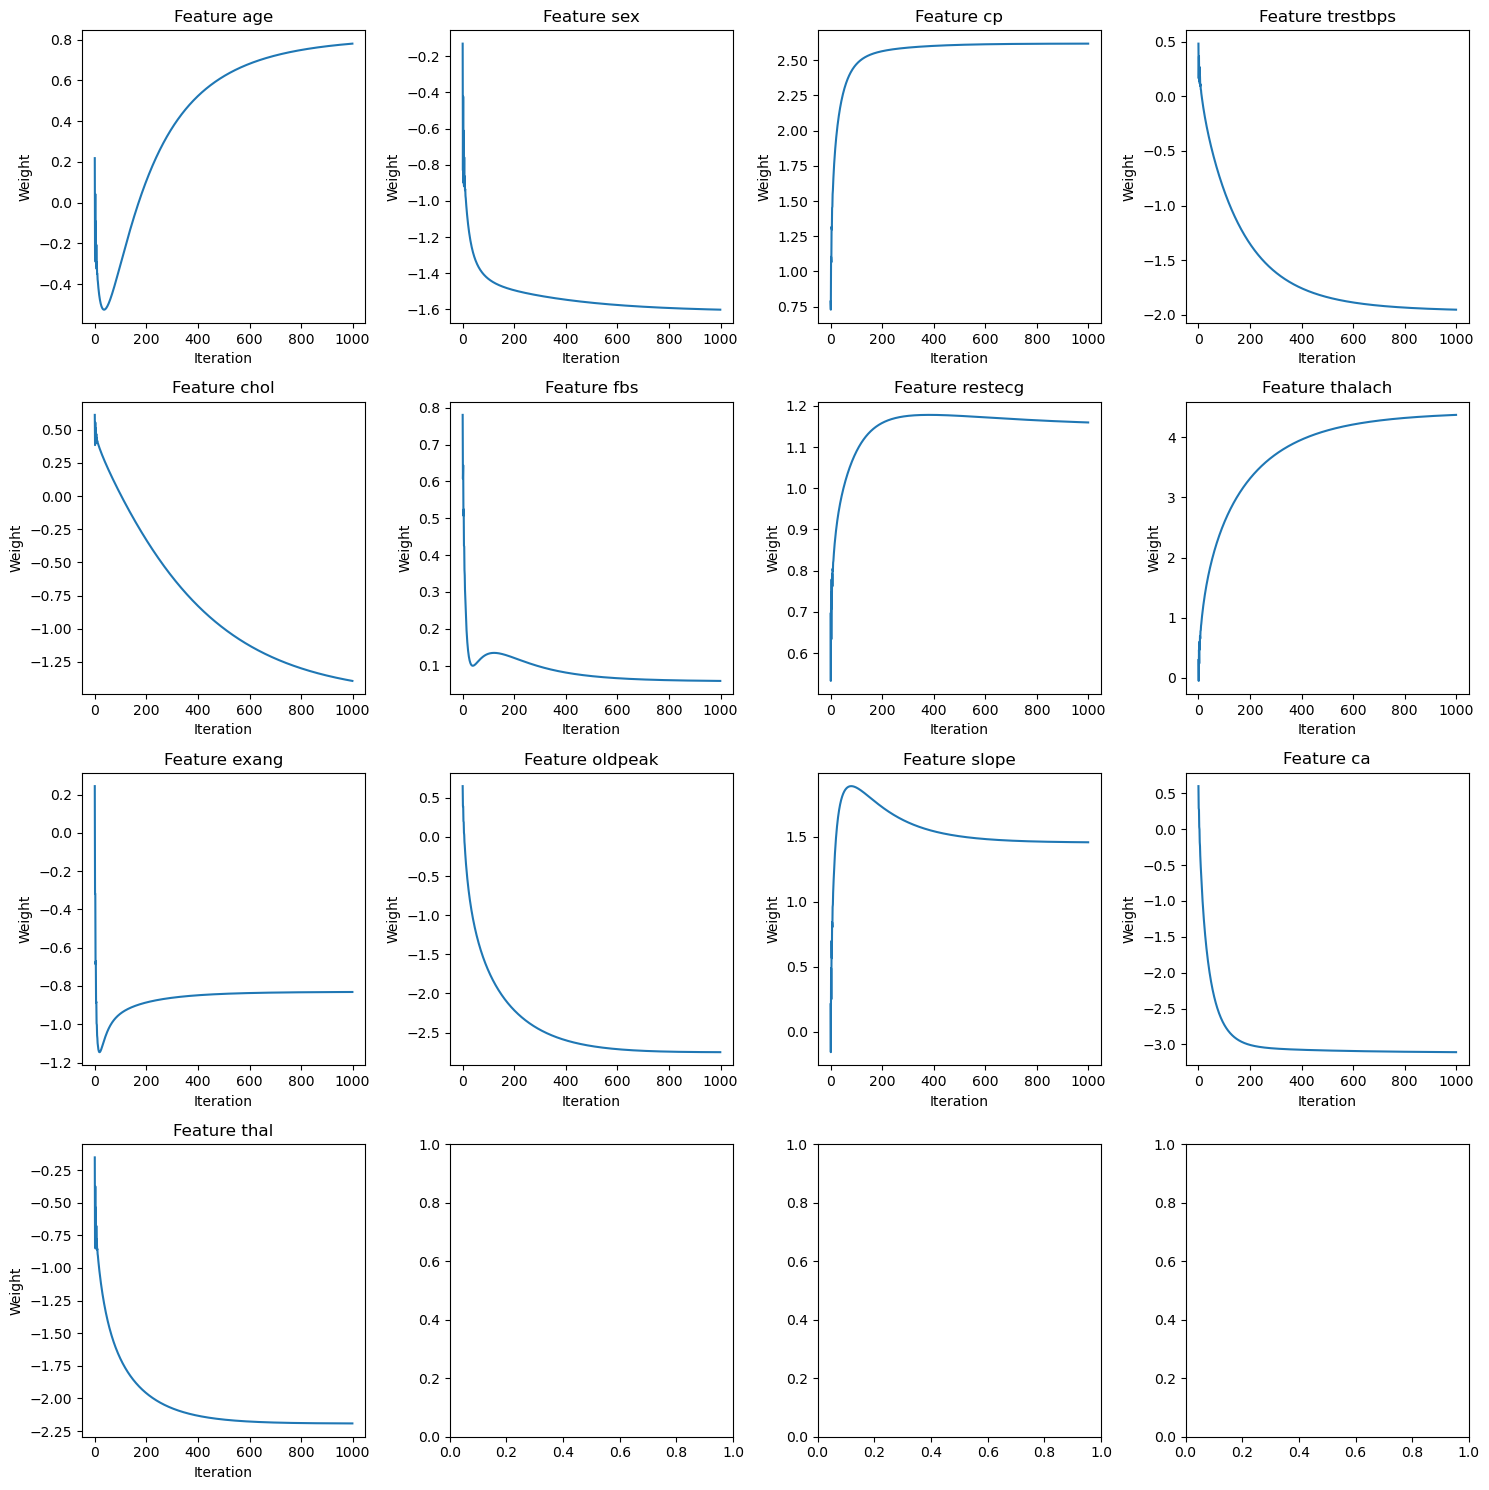

In [6]:
# Initialize parameters
max_iterations = 1000
alpha = 0.01
initial_weights = np.ones(X.shape[1])

# Store weights for each iteration
weights_history = []

# Perform gradient descent
weights = initial_weights
for _ in range(max_iterations):
    predictions = sigmoid(np.dot(X, weights))
    error_vector = y - predictions
    gradient = np.dot(X.T, error_vector)
    weights += alpha * gradient
    weights_history.append(weights.copy())

# Convert weights history to a numpy array for easier slicing
weights_history = np.array(weights_history)

# Plot the weights for each feature
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for i in range(X.shape[1]):
    axes[i].plot(weights_history[:, i])
    axes[i].set_title(f'Feature {X.columns[i]}')
    axes[i].set_xlabel('Iteration')
    axes[i].set_ylabel('Weight')

plt.tight_layout()
plt.show()


## Scikit-learn

For comparison, import scikit-learn's standard `LogisticRegression()` function. Initialize it with **no intercept** and **C=1e16** or another very high number. The reason is as follows: our implementation has not used an intercept, and you have not performed any regularization such as Lasso or Ridge (scikit-learn uses l2 by default). The high value of `C` will essentially negate this. Also, set the `random_state` to 2 and use the `'liblinear'` solver. 

After initializing a regression object, fit it to `X` and `y`.

In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')

# Fit the model to the data
log_reg.fit(X, y)

# Print the coefficients
print(log_reg.coef_)

[[ 0.81221467 -1.61293693  2.6179496  -1.96887354 -1.50936862  0.05688225
   1.1521945   4.42098698 -0.83027951 -2.74686109  1.45580368 -3.115599
  -2.19130405]]


## Compare the models

Compare the coefficient weights of your model to that generated by scikit-learn.

In [8]:
# Print the weights from your model
print("Weights from custom model:")
print(weights)

# Print the weights from scikit-learn model
print("\nWeights from scikit-learn model:")
print(log_reg.coef_)

# Calculate and print the difference
difference = weights - log_reg.coef_.flatten()
print("\nDifference between custom model and scikit-learn model weights:")
print(difference)

Weights from custom model:
[ 0.78044793 -1.60170659  2.6177325  -1.95206933 -1.39392545  0.05817283
  1.15982459  4.3695281  -0.8313503  -2.75090522  1.45773757 -3.1079882
 -2.19161296]

Weights from scikit-learn model:
[[ 0.81221467 -1.61293693  2.6179496  -1.96887354 -1.50936862  0.05688225
   1.1521945   4.42098698 -0.83027951 -2.74686109  1.45580368 -3.115599
  -2.19130405]]

Difference between custom model and scikit-learn model weights:
[-0.03176674  0.01123034 -0.0002171   0.01680421  0.11544316  0.00129058
  0.00763009 -0.05145888 -0.00107079 -0.00404413  0.00193389  0.00761079
 -0.00030891]


## Level up (Optional)

Update the gradient descent algorithm to also return the cost after each iteration. Then rerun the algorithm and create a graph displaying the cost versus the iteration number.

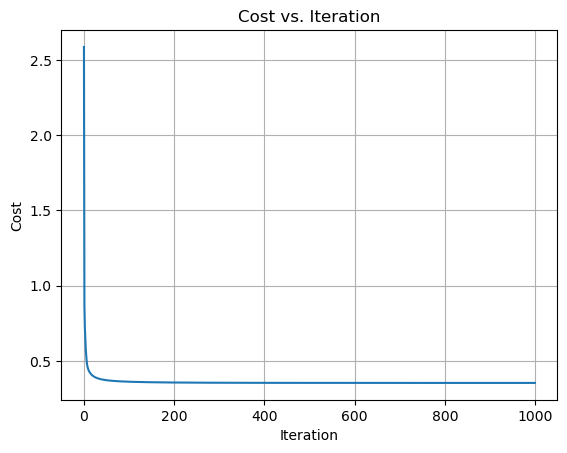

In [9]:
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Perform gradient descent to learn weights for logistic regression and return the cost after each iteration."""
    if initial_weights is None:
        initial_weights = np.ones(X.shape[1])
    
    weights = initial_weights
    m = len(y)
    cost_history = []

    for _ in range(max_iterations):
        # Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X, weights))
        
        # Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        
        # Calculate the gradient
        gradient = np.dot(X.T, error_vector)
        
        # Update the weight vector: take a step of alpha in the direction of the gradient
        weights += alpha * gradient
        
        # Calculate the cost
        cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        cost_history.append(cost)
    
    # Return finalized weights and cost history
    return weights, cost_history

# Initialize parameters
max_iterations = 1000
alpha = 0.01
initial_weights = np.ones(X.shape[1])

# Perform gradient descent and get the cost history
weights, cost_history = grad_desc(X, y, max_iterations, alpha, initial_weights)

# Plot the cost versus iteration number
plt.plot(range(max_iterations), cost_history)
plt.title('Cost vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

## Additional Resources

If you want to see more of the mathematics behind the gradient derivation above, check out section 4.4.1 from the Elements of Statistical Learning which can be found here: https://web.stanford.edu/~hastie/ElemStatLearn//.

## Summary

Congratulations! You just coded logistic regression from the ground up using NumPy! With this, you should have a fairly deep understanding of logistic regression and how the algorithm works! In the upcoming labs, you'll continue to explore this from a few more angles, plotting your data along with the decision boundary for our predictions.